In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

--2021-09-30 16:55:43--  http://handsonml.control.lth.se/data/training_data.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54950 (54K) [text/csv]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>]  53.66K   244KB/s    in 0.2s    

2021-09-30 16:55:44 (244 KB/s) - ‘training_data.csv’ saved [54950/54950]

--2021-09-30 16:55:44--  http://handsonml.control.lth.se/data/songs_to_classify.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14306 (14K) [text/csv]
Saving to: ‘songs_to_classify.csv’

songs_to_classify.c 100%[==========

In [3]:
# Load data
train = pd.read_csv("training_data.csv")
test = pd.read_csv("songs_to_classify.csv")
print("Training data shape: ",train.shape)
print("Testing data shape: ", test.shape)
print("Label data shape: ",train.label.shape)

Training data shape:  (750, 14)
Testing data shape:  (200, 13)
Label data shape:  (750,)


In [ ]:
test.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
61,0.47100,0.633,255213,0.434,0.000000,0,0.2330,-10.303,1,0.1520,84.035,4,0.418
9,0.11300,0.875,163687,0.369,0.000000,10,0.1050,-8.297,1,0.2150,115.014,4,0.453
59,0.36400,0.811,235897,0.734,0.000002,0,0.1210,-6.626,0,0.3340,150.060,4,0.566
29,0.16400,0.533,180918,0.889,0.001100,1,0.0890,-4.963,0,0.0951,106.950,4,0.701
11,0.00456,0.867,257360,0.517,0.000339,11,0.0864,-13.222,0,0.0875,133.148,4,0.866


In [ ]:
# Inspect data
train.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
273,0.03250,0.544,238493,0.500,0.000004,11,0.1090,-8.253,1,0.0260,93.621,4,0.177,1
565,0.34700,0.616,294147,0.573,0.000001,0,0.1040,-7.133,1,0.0393,163.987,4,0.260,1
231,0.00113,0.838,215481,0.880,0.008090,2,0.1010,-4.941,1,0.0458,123.024,4,0.354,1
746,0.00197,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
540,0.90800,0.606,180040,0.296,0.000000,4,0.2550,-8.356,1,0.0502,115.085,3,0.668,1


In [ ]:
train.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc46278590>,
      dtype=object)

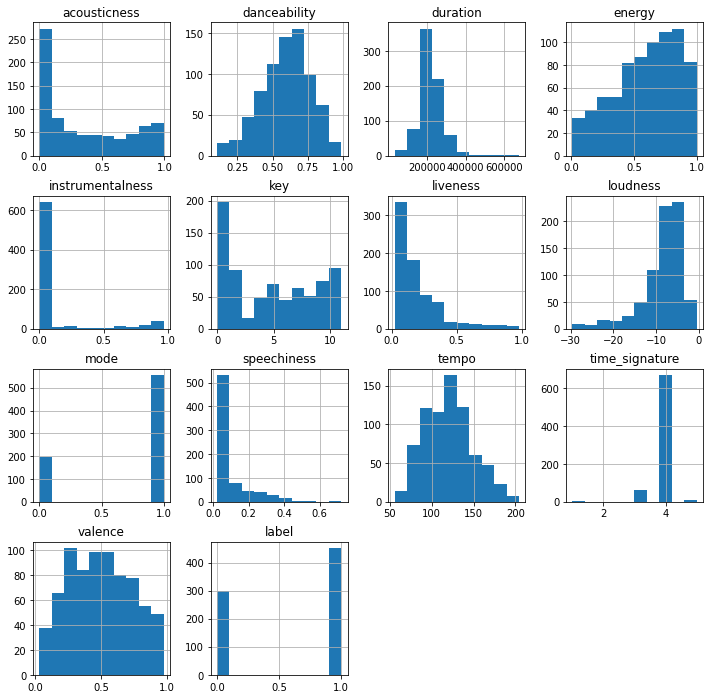

In [ ]:
train.hist(figsize=(12, 12))

In [ ]:
#locate the liked songs 
train.loc[:,'label']==1
#locate the disliked songs 
train[train['label']==0]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
6,0.597000,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
16,0.003290,0.688,279829,0.819,0.000018,7,0.0943,-6.935,1,0.0558,146.003,4,0.457,0
19,0.017800,0.847,226547,0.609,0.000000,4,0.0707,-6.335,1,0.4160,128.006,4,0.625,0
21,0.135000,0.651,189531,0.876,0.000000,8,0.2240,-7.033,1,0.3570,76.166,4,0.736,0
23,0.023500,0.464,198237,0.771,0.000000,8,0.0630,-4.503,1,0.3360,158.777,4,0.690,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.001160,0.601,148125,0.990,0.520000,6,0.1240,-3.016,1,0.3370,127.958,4,0.192,0
739,0.102000,0.803,216575,0.631,0.000007,8,0.0858,-4.213,1,0.0444,104.999,4,0.659,0
740,0.202000,0.755,216450,0.577,0.000000,3,0.2340,-7.549,1,0.1570,100.034,4,0.451,0
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[2.41448976, 0.59020861, 0.22803514, 0.17437982, 0.18779365,
         0.13413832, 0.10731066, 0.0402415 , 0.06706916, 0.05365533],
        [3.64856231, 1.07310656, 0.69751927, 0.60362244, 0.60362244,
         0.54996711, 0.46948412, 0.6304501 , 0.84507142, 0.93896824]]),
 array([1.17000000e-06, 9.94010530e-02, 1.98800936e-01, 2.98200819e-01,
        3.97600702e-01, 4.97000585e-01, 5.96400468e-01, 6.95800351e-01,
        7.95200234e-01, 8.94600117e-01, 9.94000000e-01]),
 <a list of 2 Lists of Patches objects>)

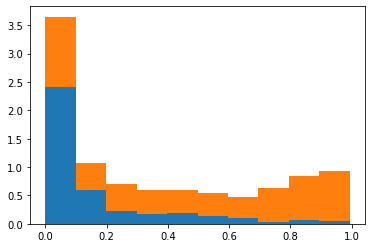

In [ ]:
#see how the data looks for liked songs
ind0 = train.loc[:,'label']==0
ind1 = train.loc[:,'label']==1
#train.loc[ind0,'danceability']
names=['acousticness','danceability','duration','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence','label']

plt.hist((train.loc[ind0,'acousticness'],train.loc[ind1,'acousticness']), stacked=True, density = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.06067501, 0.0303375 , 0.06067501, 0.22753129, 0.3488813 ,
         0.81911263, 1.16799393, 0.9556314 , 0.68259386, 0.16685628],
        [0.22753129, 0.2882063 , 0.71293136, 1.19833144, 1.69890027,
         2.19946909, 2.35115662, 1.50170648, 0.94046265, 0.25786879]]),
 array([0.107 , 0.1949, 0.2828, 0.3707, 0.4586, 0.5465, 0.6344, 0.7223,
        0.8102, 0.8981, 0.986 ]),
 <a list of 2 Lists of Patches objects>)

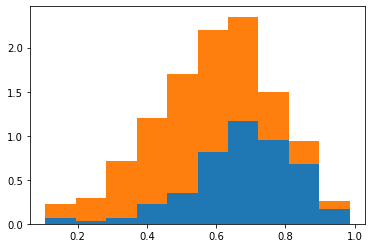

In [ ]:
plt.hist((train.loc[ind0,'danceability'],train.loc[ind1,'danceability']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[1.87055743e-07, 5.19599285e-07, 3.53327514e-06, 1.66271771e-06,
         2.28623685e-07, 4.15679428e-08, 0.00000000e+00, 0.00000000e+00,
         2.07839714e-08, 0.00000000e+00],
        [3.53327514e-07, 1.55879786e-06, 7.54458162e-06, 4.53090577e-06,
         1.20547034e-06, 2.28623685e-07, 2.07839714e-08, 6.23519142e-08,
         4.15679428e-08, 4.15679428e-08]]),
 array([ 33840.,  97992., 162144., 226296., 290448., 354600., 418752.,
        482904., 547056., 611208., 675360.]),
 <a list of 2 Lists of Patches objects>)

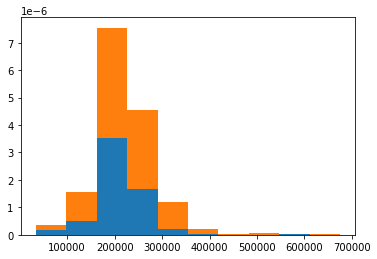

In [ ]:
plt.hist((train.loc[ind0,'duration'],train.loc[ind1,'duration']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.01352608, 0.0676304 , 0.09468256, 0.10820864, 0.18936512,
         0.37873024, 0.5410432 , 0.78451264, 0.9468256 , 0.90624736],
        [0.44636064, 0.5410432 , 0.70335616, 0.70335616, 1.10913856,
         1.17676896, 1.352608  , 1.47434272, 1.51492096, 1.12266464]]),
 array([0.00925 , 0.107825, 0.2064  , 0.304975, 0.40355 , 0.502125,
        0.6007  , 0.699275, 0.79785 , 0.896425, 0.995   ]),
 <a list of 2 Lists of Patches objects>)

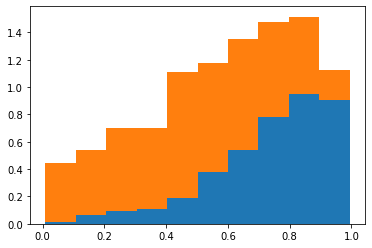

In [ ]:
plt.hist((train.loc[ind0,'energy'],train.loc[ind1,'energy']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[3.73664254, 0.0551534 , 0.04136505, 0.        , 0.01378835,
         0.0275767 , 0.04136505, 0.0275767 , 0.11030679, 0.0551534 ],
        [8.83833161, 0.13788349, 0.15167184, 0.0275767 , 0.0551534 ,
         0.06894174, 0.15167184, 0.08273009, 0.28955533, 0.5377456 ]]),
 array([0.    , 0.0967, 0.1934, 0.2901, 0.3868, 0.4835, 0.5802, 0.6769,
        0.7736, 0.8703, 0.967 ]),
 <a list of 2 Lists of Patches objects>)

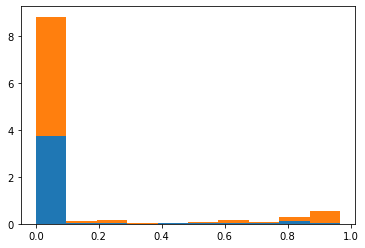

In [ ]:
plt.hist((train.loc[ind0,'instrumentalness'],train.loc[ind1,'instrumentalness']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.09575758, 0.03393939, 0.00606061, 0.0169697 , 0.03393939,
         0.02545455, 0.03272727, 0.03636364, 0.02545455, 0.05454545],
        [0.24      , 0.11151515, 0.02060606, 0.05818182, 0.08363636,
         0.05333333, 0.07636364, 0.06181818, 0.08969697, 0.11393939]]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 2 Lists of Patches objects>)

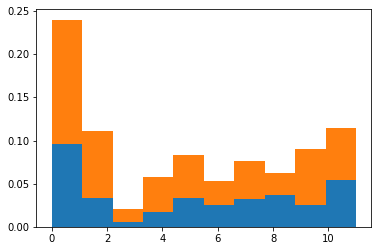

In [ ]:
plt.hist((train.loc[ind0,'key'],train.loc[ind1,'key']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[1.63350785, 0.86561955, 0.53054101, 0.54450262, 0.22338569,
         0.12565445, 0.06980803, 0.06980803, 0.09773124, 0.        ],
        [4.69109948, 2.54101222, 1.2425829 , 0.97731239, 0.26527051,
         0.19546248, 0.18150087, 0.12565445, 0.13961606, 0.11169284]]),
 array([0.024 , 0.1195, 0.215 , 0.3105, 0.406 , 0.5015, 0.597 , 0.6925,
        0.788 , 0.8835, 0.979 ]),
 <a list of 2 Lists of Patches objects>)

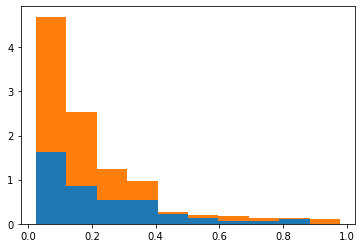

In [ ]:
plt.hist((train.loc[ind0,'liveness'],train.loc[ind1,'liveness']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.        , 0.        , 0.        , 0.        , 0.00183478,
         0.00412825, 0.0087152 , 0.03302601, 0.06696941, 0.02201734],
        [0.00412825, 0.00321086, 0.00779781, 0.00688042, 0.01100867,
         0.02293473, 0.0504564 , 0.10458236, 0.10825192, 0.02476951]]),
 array([-29.601 , -26.6942, -23.7874, -20.8806, -17.9738, -15.067 ,
        -12.1602,  -9.2534,  -6.3466,  -3.4398,  -0.533 ]),
 <a list of 2 Lists of Patches objects>)

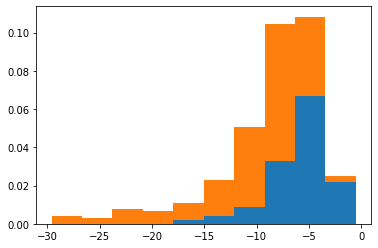

In [ ]:
plt.hist((train.loc[ind0,'loudness'],train.loc[ind1,'loudness']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[1.2       , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 2.77333333],
        [2.58666667, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 7.41333333]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

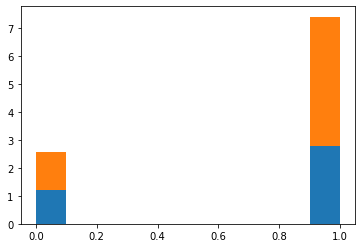

In [ ]:
plt.hist((train.loc[ind0,'mode'],train.loc[ind1,'mode']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[ 2.52293578,  0.80275229,  0.78363914,  0.72629969,  0.4969419 ,
          0.2293578 ,  0.0764526 ,  0.0382263 ,  0.        ,  0.01911315],
        [10.16819572,  1.47171254,  0.87920489,  0.80275229,  0.55428135,
          0.3058104 ,  0.09556575,  0.0382263 ,  0.        ,  0.01911315]]),
 array([0.0234 , 0.09316, 0.16292, 0.23268, 0.30244, 0.3722 , 0.44196,
        0.51172, 0.58148, 0.65124, 0.721  ]),
 <a list of 2 Lists of Patches objects>)

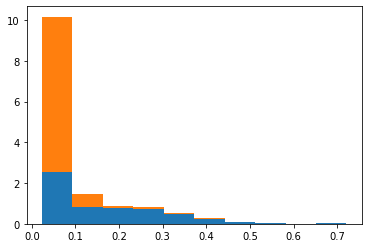

In [ ]:
plt.hist((train.loc[ind0,'speechiness'],train.loc[ind1,'speechiness']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.00017968, 0.00197644, 0.00539029, 0.00368337, 0.00539029,
         0.00386304, 0.00269515, 0.00242563, 0.00071871, 0.00044919],
        [0.00125773, 0.00655819, 0.01087042, 0.01042123, 0.01473346,
         0.0110501 , 0.00548013, 0.00422239, 0.00206628, 0.00071871]]),
 array([ 55.747 ,  70.5885,  85.43  , 100.2715, 115.113 , 129.9545,
        144.796 , 159.6375, 174.479 , 189.3205, 204.162 ]),
 <a list of 2 Lists of Patches objects>)

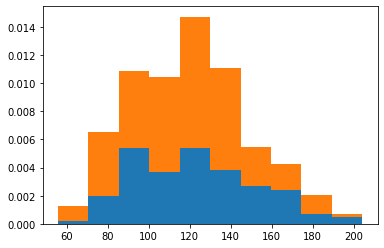

In [ ]:
plt.hist((train.loc[ind0,'tempo'],train.loc[ind1,'tempo']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.00333333, 0.        , 0.        , 0.        , 0.        ,
         0.03333333, 0.        , 0.93666667, 0.        , 0.02      ],
        [0.02      , 0.        , 0.        , 0.        , 0.        ,
         0.21333333, 0.        , 2.23666667, 0.        , 0.03      ]]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 2 Lists of Patches objects>)

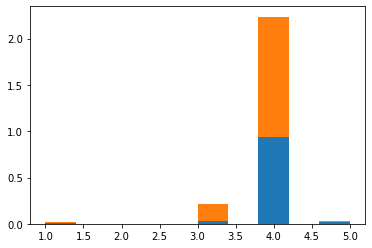

In [ ]:
plt.hist((train.loc[ind0,'time_signature'],train.loc[ind1,'time_signature']), stacked=True, density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.12741559, 0.25483117, 0.43887591, 0.39640405, 0.53797692,
         0.69370709, 0.52381964, 0.48134777, 0.36808947, 0.39640405],
        [0.53797692, 0.93438097, 1.44404332, 1.18921215, 1.40157146,
         1.40157146, 1.132583  , 1.10426842, 0.77865081, 0.69370709]]),
 array([0.0332 , 0.12738, 0.22156, 0.31574, 0.40992, 0.5041 , 0.59828,
        0.69246, 0.78664, 0.88082, 0.975  ]),
 <a list of 2 Lists of Patches objects>)

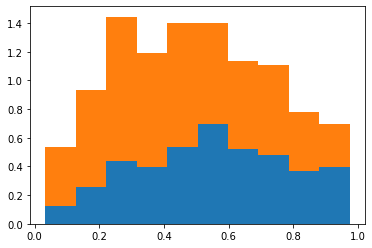

In [ ]:
plt.hist((train.loc[ind0,'valence'],train.loc[ind1,'valence']), stacked=True, density = True)

In [ ]:
#names=["'acousticness'","'danceability'","'duration'","'energy'","'instrumentalness'","'key'","'liveness'","'loudness'","'mode'","'speechiness'","'tempo'","'time_signature'","'valence'","'label'"]
for i in names:
  print(i)

acousticness
danceability
duration
energy
instrumentalness
key
liveness
loudness
mode
speechiness
tempo
time_signature
valence
label


In [4]:
#feature_selection = ['acousticness','danceability','duration','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence','label'] # All features
#select all features
feature_selection = ['acousticness','danceability','duration','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']

# Split data into features and labels, convert labels R->0 and M->1
X, y = train.loc[:, feature_selection], train.loc[:, 'label']

#scale the data
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#X = X*1/np.max(np.abs(X), axis=0)
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_test = test.loc[:,feature_selection].values
scaler = StandardScaler()
scaler.fit(X_test)
X_test_n= scaler.transform(X_test)


from sklearn.model_selection import train_test_split
# Split into train and test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# To have consistent performance for decision trees here and for normalized version 
# we need the same random state, and since I say it should not matter with scaling 
# for decision trees I think it is nicer to get the same result.

from sklearn.tree import DecisionTreeClassifier
np.random.seed(37) 

classifiers = [
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=2)]
    
from sklearn.model_selection import cross_val_score

for clf in classifiers:
    clf.fit(X_train_new, y_train_new)
    score_tr = clf.score(X_train_new, y_train_new)
    score_test = clf.score(X_test_new, y_test_new)
    score_cv = cross_val_score(clf, X_test_new, y_test_new, cv=20)
    print("{} test accuracy: {}".format(clf.__class__.__name__, score_tr))
    print("{} train accuracy: {}".format(clf.__class__.__name__, score_test))
    print("{} test accuracy cross valid: {}".format(clf.__class__.__name__, np.mean(score_cv)))
    print()

KNeighborsClassifier test accuracy: 0.8565737051792829
KNeighborsClassifier train accuracy: 0.8145161290322581
KNeighborsClassifier test accuracy cross valid: 0.7544871794871795

DecisionTreeClassifier test accuracy: 0.8266932270916335
DecisionTreeClassifier train accuracy: 0.7943548387096774
DecisionTreeClassifier test accuracy cross valid: 0.7903846153846155



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
#find the best tuning parameters 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 1000],
    'max_depth': [2, 3, 4, 5, 6]
    }

search = GridSearchCV(clf, param_grid, cv=4, verbose=1,n_jobs=-1)

search.fit(X_train_new, y_train_new)
#score = search.score(X_test_new, y_test_new)
score=cross_val_score(clf, X_test_new, y_test_new, cv=20)
print("Best CV score: {} using {}".format(search.best_score_, search.best_params_))
print("Test accuracy: {}".format(score))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   27.4s finished


Best CV score: 0.8246666666666667 using {'max_depth': 6, 'n_estimators': 1000}
Test accuracy: [0.84615385 1.         0.69230769 0.92307692 0.84615385 0.92307692
 0.76923077 0.69230769 0.83333333 0.75       0.66666667 0.83333333
 0.83333333 0.83333333 0.91666667 0.75       1.         0.58333333
 0.83333333 1.        ]


In [ ]:
#try the best Random Forest Classifier
#from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=1000,max_depth=5)
randomForestModel.fit(X_train_new, y_train_new)
score_cv = cross_val_score(randomForestModel, X_test_new, y_test_new, cv=20)
score_test  =randomForestModel.score(X_test_new, y_test_new)
print("Score with RandomForestClassifier - cross validation: ",np.mean(score_cv))
print("Score with RandomForestClassifier - testing: ",score_test)

Score with RandomForestClassifier - cross validation:  0.8349358974358975
Score with RandomForestClassifier - testing:  0.8104838709677419


In [ ]:
# get Feature Imporance for each feature using Random Forest
from pandas import DataFrame
feature_df = DataFrame(train.columns.delete(0))
feature_df.columns = ['Features']
feature_df["Feature Importance"] = pd.Series(randomForestModel.feature_importances_)

# preview
feature_df

,Features,Feature Importance
0,danceability,0.140739
1,duration,0.099575
2,energy,0.050616
3,instrumentalness,0.133596
4,key,0.027839
5,liveness,0.019265
6,loudness,0.034055
7,mode,0.171696
8,speechiness,0.002946
9,tempo,0.238341


In [9]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

logitmodel = LogisticRegression(max_iter=1000,tol=0.001)
logitmodel.fit(X_train_new, y_train_new)
score_test = logitmodel.score(X_test_new, y_test_new)
print('Accuracy of the Logistic Regression model {0:.4f}'.format(score_test))
score_cv = cross_val_score(logitmodel, X_test_new, y_test_new, cv=20)
print("Score with Logistic Regression: ",np.mean(score_cv))


Accuracy of the Logistic Regression model 0.7944
Score with Logistic Regression:  0.7955128205128206


In [ ]:
# Make Predictions on Test Data and compare with truth
predictions = logitmodel.predict(X_test_n)
print("Predictions: ",predictions, "\n")
#print("True data: ",y_test_new,"\n")

Predictions:  [0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1] 



In [ ]:
from sklearn.ensemble import BaggingClassifier

#try decision bagging (with Decision Tree - as base_estimator = None)
baggingmodel = BaggingClassifier(n_estimators=55, max_features = 13) #10, 13
baggingmodel.fit(X_train_new, y_train_new)
score_test = baggingmodel.score(X_test_new, y_test_new)
print('Accuracy of the Bagging model {0:.4f}'.format(score_test))
score_cv =cross_val_score(baggingmodel, X_test_new, y_test_new, cv=20)
print("Score with Bagging: ",np.mean(score_cv))

predictions = baggingmodel.predict(X=X_test_n)
print(predictions)

for elem in predictions:
  print(elem,end='')


Accuracy of the Bagging model 0.8548
Score with Bagging:  0.8506410256410255
[0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1]
00110111101011101111101011111111111110011011010111111101010011011110111101110111111101111111111011111111111111111010111100111111111111111110000110011011101111101101101101111101111111101110110001101111

In [ ]:
#X_test = test.loc[:,feature_selection].values
#scaler = StandardScaler()
#scaler.fit(X)
#X_test_n= scaler.transform(X_test)

# make predictions with bagging model
predictions = baggingmodel.predict(X=X_test_n)
print(predictions)

[0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1]


In [ ]:
#try Boosting model
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:   
    gbmodel = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=6, max_depth=3, random_state=0)
    gbmodel.fit(X_train_new, y_train_new)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (test): {0:.3f}".format(gbmodel.score(X_test_new, y_test_new)))
    score=cross_val_score(gbmodel, X_test_new, y_test_new, cv=20)
    print("Accuracy score (cross-validation)",np.mean(score))


Learning rate:  0.05
Accuracy score (test): 0.839
Accuracy score (cross-validation) 0.8262820512820515
Learning rate:  0.075
Accuracy score (test): 0.839
Accuracy score (cross-validation) 0.8384615384615384
Learning rate:  0.1
Accuracy score (test): 0.851
Accuracy score (cross-validation) 0.8387820512820514
Learning rate:  0.25
Accuracy score (test): 0.839
Accuracy score (cross-validation) 0.8381410256410255
Learning rate:  0.5
Accuracy score (test): 0.827
Accuracy score (cross-validation) 0.8259615384615385
Learning rate:  0.75
Accuracy score (test): 0.827
Accuracy score (cross-validation) 0.8304487179487179
Learning rate:  1
Accuracy score (test): 0.831
Accuracy score (cross-validation) 0.8307692307692307


In [ ]:
gbmodel_good = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_features=6, max_depth=3, random_state=0)
gbmodel_good.fit(X_train_new, y_train_new)
score=cross_val_score(gbmodel_good, X_test_new, y_test_new, cv=20)
score2 = gbmodel_good.score(X_test_new, y_test_new)
print("Accuracy score (cross-validation)",np.mean(score))
print("Accuracy score ",score2)

# make predictions with bagging model
predictions = gbmodel_good.predict(X=X_test_n)
print(predictions)

Accuracy score (cross-validation) 0.8387820512820514
Accuracy score  0.8508064516129032
[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1]


In [ ]:
for elem in predictions:
  print(elem,end='')

00010011001101101011101100000111011111010101010110001101100011100111101011110110110101110000001011111010010111110010101011101110101011111111101011001010001111111101111111111100011011111110100111110111

In [ ]:
#try SVM model
from sklearn import svm

svmmodel = svm.SVC()
svmmodel.fit(X_train_new, y_train_new)
score_test = svmmodel.score(X_test_new, y_test_new)
print('Accuracy of the SVM model {0:.4f}'.format(score_test))
score_cv = cross_val_score(svmmodel, X_test_new, y_test_new, cv=20)
print("Score with SVM: ",np.mean(score_cv))

Accuracy of the SVM model 0.8024
Score with SVM:  0.7756410256410257
